In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from matplotlib.pyplot import cm
from scipy.stats import gaussian_kde

In [2]:
fielddict={'SgrB2S':1,'DSi':10,'DSii':10,'DSiii':10,'DSiv':10,'DSv':10,'DSVI':2,'DSVII':3,'DSVIII':3,'DSIX':7}
romansources={'SgrB2S':'Sgr B2(S)','DSi':'DS1','DSii':'DS2','DSiii':'DS3','DSiv':'DS4','DSv':'DS5','DSVI':'DS6','DSVII':'DS7',
              'DSVIII':'DS8','DSIX':'DS9'}
sources=list(fielddict.keys())

In [3]:
plt.rcParams["figure.dpi"]=150
dsfmt='*'
rainbow=cm.rainbow(np.arange(0,10,len(sources)))
cmaps=['plasma','viridis','cividis','inferno','magma','Greys','Reds','Blues','Greens','PuRd']
sourcecolors=['red','cyan','orange','green','deepskyblue','black','rosybrown','darkviolet','dimgray','olivedrab']
ls=['solid', 'dashed', 'dashdot', 'dotted','solid', 'dashed', 'dashdot', 'dotted','solid','dashed']

In [4]:
#rng=[[20,1100],[1e-8,1e-6]]
masterZ=[]
textent=[]
aextent=[]
#[[ 3.,  6.,  9., 12., 15., 18., 21., 24.],
#[ 8., 16., 24., 32., 40., 48., 56.],
#[ 5., 10., 15., 20., 25., 30., 35., 40.],
#[ 3.,  6.,  9., 12., 15., 18., 21., 24.,],
#[ 8., 16., 24., 32., 40., 48., 56., 64.],
#[ 1.5,  3.,   4.5,  6.,   7.5, 9.,  10.5],
#[ 6., 12., 18., 24., 30., 36., 42., 48.],
#[ 3.,  6.,  9., 12., 15., 18., 21.],
#[ 2.5,  5.,   7.5, 10.,  12.5, 15.,  17.5, 20. ],
#[ 2.5,  5.,   7.5, 10.,  12.5, 15.,  17.5]]
masterX=[]
masterY=[]

tavg=[]
aavg=[]

for s in sources:
    abuns=np.loadtxt(f'intstd_{s}_abuns.txt')
    errabuns=np.loadtxt(f'intstd_{s}_errabuns.txt')
    tex=np.loadtxt(f'intstd_{s}_tex.txt')
    errtex=np.loadtxt(f'intstd_{s}_errtex.txt')
    #X,Y=np.meshgrid(tex,abuns
    ok=np.isfinite(tex)*np.isfinite(abuns)*np.isfinite(errabuns)
    temptavg=np.average(tex[ok],weights=(errtex[ok]))
    tempaavg=np.average(abuns[ok],weights=(errabuns[ok]))
    
    tmin=np.nanmin(tex[ok])
    tmax=np.nanmax(tex[ok])
    textent.append((tmin,tmax))
    amin=np.nanmin(abuns[ok])
    amax=np.nanmax(abuns[ok])
    aextent.append((amin,amax))
    tavg.append(temptavg)
    aavg.append(tempaavg)
    
    X,Y=np.mgrid[tmin:tmax:100j, amin:amax:100j]
    masterX.append(X)
    masterY.append(Y)
    positions=np.vstack([X.ravel(),Y.ravel()])
    values=np.vstack([tex[ok],abuns[ok]])
    errors=np.vstack([errtex[ok],errabuns[ok]])
    kernel=gaussian_kde(values)#,weights=errabuns[ok])
    Z=np.reshape(kernel(positions).T,X.shape)
    masterZ.append(Z)
#plt.show()

In [5]:
np.shape(errors)

(2, 387)

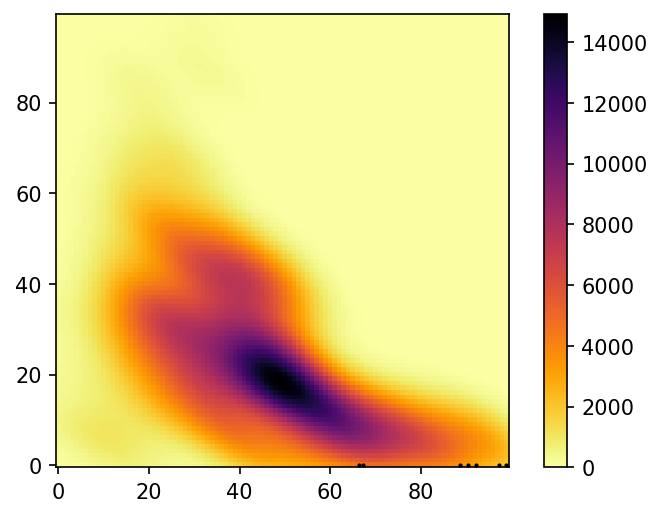

In [6]:

#print(lvls[0])
plt.plot(tex[ok],abuns[ok],'k.',markersize=2)
#plt.yscale('log')
plt.imshow(masterZ[0],cmap='inferno_r',origin='lower')#,#extent=[textent[0][0],textent[0][1],200,800])#aextent[0][0],
                   #aextent[0][1]])
#plt.xlim(xmax=10)#[textent[0][0],textent[0][1]])
#plt.ylim([aextent[0][0],aextent[0][1]])
plt.colorbar()
plt.show()


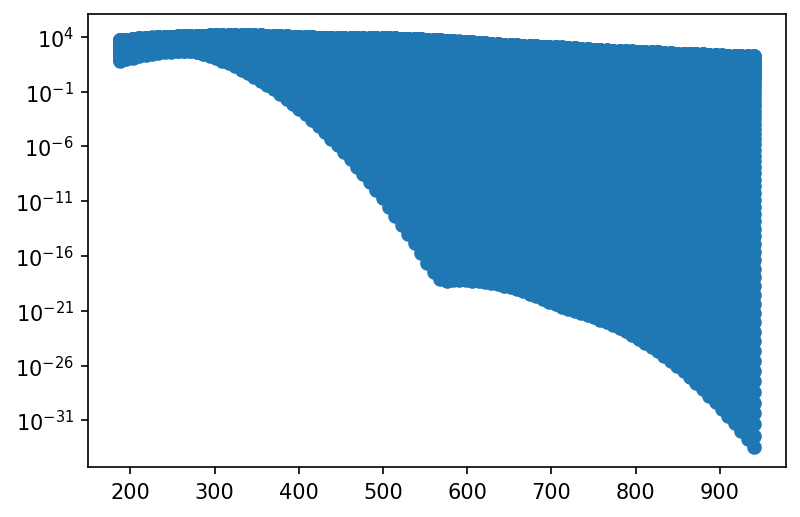

In [7]:
plt.scatter(masterX[0],masterZ[0])
plt.yscale('log')

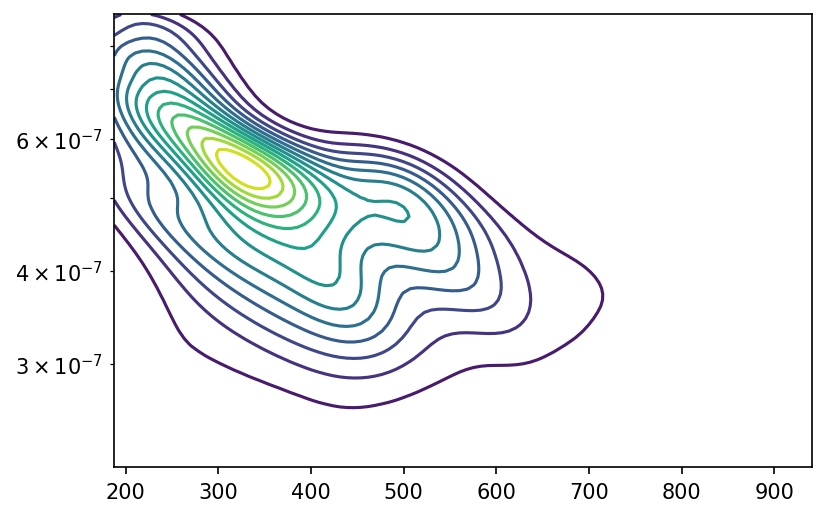

In [8]:
testlvls=np.linspace(np.min(masterZ[0]),np.max(masterZ[0]),15)
plt.contour(masterX[0],masterY[0],masterZ[0],levels=testlvls)
plt.yscale('log')

In [11]:
#rng=[[20,1100],[1e-8,1e-6]]
lvls=[]
#[[ 3.,  6.,  9., 12., 15., 18., 21., 24.],
#[ 8., 16., 24., 32., 40., 48., 56.],
#[ 5., 10., 15., 20., 25., 30., 35., 40.],
#[ 3.,  6.,  9., 12., 15., 18., 21., 24.,],
#[ 8., 16., 24., 32., 40., 48., 56., 64.],
#[ 1.5,  3.,   4.5,  6.,   7.5, 9.,  10.5],
#[ 6., 12., 18., 24., 30., 36., 42., 48.],
#[ 3.,  6.,  9., 12., 15., 18., 21.],
#[ 2.5,  5.,   7.5, 10.,  12.5, 15.,  17.5, 20. ],
#[ 2.5,  5.,   7.5, 10.,  12.5, 15.,  17.5]]
first=True

for s,kern in zip(sources,masterZ):
    '''
    abuns=np.loadtxt(f'contfix_{s}_abuns.txt')
    errabuns=np.loadtxt(f'contfix_{s}_errabuns.txt')
    tex=np.loadtxt(f'contfix_{s}_tex.txt')
    errtex=np.loadtxt(f'contfix_{s}_errtex.txt')
    #X,Y=np.meshgrid(tex,abuns
    ok=np.isfinite(tex)*np.isfinite(abuns)
    h,bx,by=np.histogram2d(tex[ok],abuns[ok],bins=15)
    cx = (bx[1:]+bx[:-1])/2.
    cy = (by[1:]+by[:-1])/2.
    tempcf=plt.contour(cx,cy,h.T,alpha=0.7,levels=5)#lvl)#,colors=rainbow)#levels=lvls,origin='lower',colors='red')
    templvls=tempcf.levels
    looplvls=np.delete(templvls,0)
    '''
    #print(looplvls)
    looplvls=np.linspace(np.min(kern),np.max(kern),5)
    lvls.append(looplvls)
    plt.close()
    #plt.legend()
plt.show()

SgrB2S:red
DSi:cyan
DSii:orange
DSiii:green
DSiv:deepskyblue
DSv:black
DSVI:rosybrown
DSVII:darkviolet
DSVIII:dimgray
DSIX:olivedrab


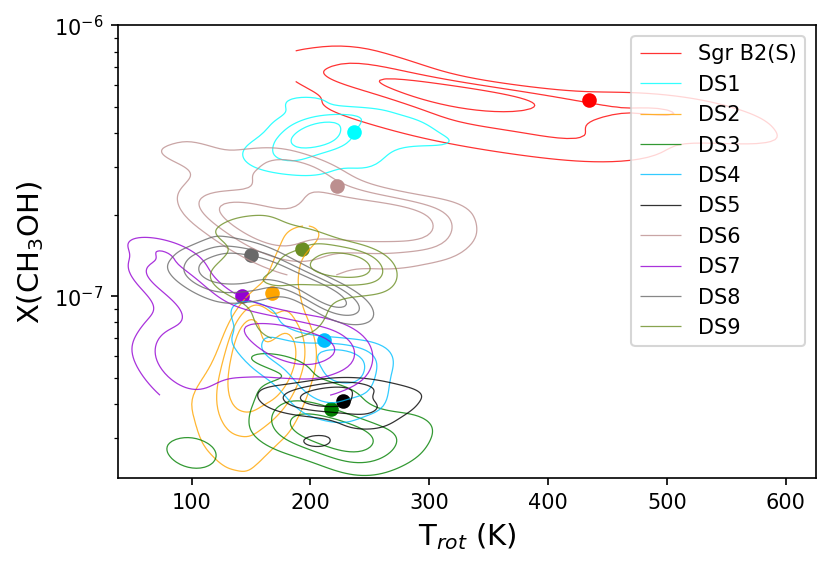

In [12]:
savefigpath='/blue/adamginsburg/d.jeff/repos/CH3OHTemps/figures/LitComparisons/intstd_weightmeanpoint_allcoreabundances.pdf'
lines=[]
roman=[]
for source,c,lvl,x,y,z,style,t,a in zip(sources,sourcecolors,lvls,masterX,masterY,masterZ,ls,tavg,aavg):
    plot=plt.contour(x,y,z,colors=c,alpha=0.8,levels=lvl,linestyles='-',linewidths=0.6)
    plt.scatter(t,a,color=c)
    h1,_ = plot.legend_elements()
    lines.append(h1[0])
    roman.append(romansources[source])
    #plt.clabel(plot,inline=1,fontsize=14)
    print(f'{source}:{c}')
plt.yscale('log')
plt.ylim(ymax=1e-6)
plt.xlim(xmax=625)
plt.xlabel('T$_{rot}$ (K)',fontsize=14)
plt.ylabel('X(CH$_3$OH)',fontsize=14)

plt.legend(lines, roman)
plt.savefig(savefigpath,)
plt.show()

In [13]:
lvls

[array([3.90068117e-34, 3.72953146e+03, 7.45906293e+03, 1.11885944e+04,
        1.49181259e+04]),
 array([1.65912858e-19, 1.39829797e+04, 2.79659595e+04, 4.19489392e+04,
        5.59319190e+04]),
 array([8.57472758e-43, 4.69835931e+04, 9.39671862e+04, 1.40950779e+05,
        1.87934372e+05]),
 array([8.60675757e-13, 9.27473325e+04, 1.85494665e+05, 2.78241997e+05,
        3.70989330e+05]),
 array([3.35910785e-56, 6.94318529e+04, 1.38863706e+05, 2.08295559e+05,
        2.77727412e+05]),
 array([7.84260401e+01, 1.76559131e+05, 3.53039836e+05, 5.29520540e+05,
        7.06001245e+05]),
 array([2.49740797e-45, 8.54642690e+03, 1.70928538e+04, 2.56392807e+04,
        3.41857076e+04]),
 array([1.36304760e-24, 2.88557798e+04, 5.77115596e+04, 8.65673394e+04,
        1.15423119e+05]),
 array([8.10098821e-27, 3.90661909e+04, 7.81323817e+04, 1.17198573e+05,
        1.56264763e+05]),
 array([8.50926592e-10, 3.14669567e+04, 6.29339135e+04, 9.44008702e+04,
        1.25867827e+05])]

In [14]:
aavg

[nan,
 nan,
 nan,
 nan,
 nan,
 4.097762055234385e-08,
 nan,
 1.0046049611578104e-07,
 1.4205419496661407e-07,
 1.4891206954645856e-07]